In [15]:
from src.DataLoader import DataLoader
import warnings
warnings.simplefilter(action='ignore')

from tqdm import tqdm
import numpy as np
import pandas as pd


dl = DataLoader(handle_nans="drop")




Loading Robinhood data
Loading CRSP data


In [ ]:
df_users = dl.merge_dfs(users=True)


Merging...


In [23]:
df_users["users"] = df_users["users"]*1e6

In [26]:
df_users

,date,ticker,holders,users,holders_adj,shrcd,vol,prc_adj,shrout_adj,daily_returns,...,mc,mc_retail,holders_change_pct,holders_change_diff,total_holders,popularity,market_weight,retail_weight,total_holders_change_pct,total_holders_change_diff
0,2018-05-02,A,590.000000,3.336986e+06,176.806240,11.0,2240482.0,65.91,322477000.0,0.000000,...,2.125446e+10,38886.900000,NaN,NaN,5.199292e+06,0.000113,0.000653,0.000078,NaN,NaN
1,2018-05-03,A,586.473684,3.347945e+06,175.174218,11.0,2365851.0,66.34,322477000.0,0.006503,...,2.139312e+10,38906.664211,-0.005977,-3.526316,5.207544e+06,0.000113,0.000659,0.000078,0.001587,8251.771750
2,2018-05-04,A,587.458333,3.358904e+06,174.895833,11.0,1331017.0,67.00,322477000.0,0.009900,...,2.160596e+10,39359.708333,0.001679,0.984649,5.204840e+06,0.000113,0.000657,0.000078,-0.000519,-2703.986424
3,2018-05-07,A,585.900000,3.391781e+06,172.741115,11.0,1468735.0,67.39,322477000.0,0.005804,...,2.173173e+10,39483.801000,-0.002653,-1.558333,5.194440e+06,0.000113,0.000658,0.000078,-0.001998,-10400.130796
4,2018-05-08,A,577.125000,3.402740e+06,169.605978,11.0,1916103.0,67.37,322477000.0,-0.000297,...,2.172528e+10,38880.911250,-0.014977,-8.775000,5.200559e+06,0.000111,0.000658,0.000077,0.001178,6119.008349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2874703,2020-08-07,ZYNE,32151.291667,1.150273e+07,2795.100416,11.0,542213.0,4.22,29255000.0,-0.018780,...,1.234561e+08,135678.450833,-0.002449,-78.916667,3.239298e+07,0.000993,0.000003,0.000030,0.001664,53808.041667
2874704,2020-08-10,ZYNE,32060.833333,1.152322e+07,2782.279787,11.0,584599.0,4.24,29255000.0,0.004728,...,1.240412e+08,135937.933333,-0.002814,-90.458333,3.245664e+07,0.000988,0.000003,0.000030,0.001965,63660.625000
2874705,2020-08-11,ZYNE,31939.875000,1.153005e+07,2770.140818,11.0,449620.0,4.07,29255000.0,-0.040920,...,1.190679e+08,129995.291250,-0.003773,-120.958333,3.249282e+07,0.000983,0.000003,0.000029,0.001115,36178.458333
2874706,2020-08-12,ZYNE,31851.578947,1.153689e+07,2760.847340,11.0,980844.0,3.96,29255000.0,-0.027399,...,1.158498e+08,126132.252632,-0.002764,-88.296053,3.247689e+07,0.000981,0.000003,0.000027,-0.000490,-15922.644737


<Axes: xlabel='date'>

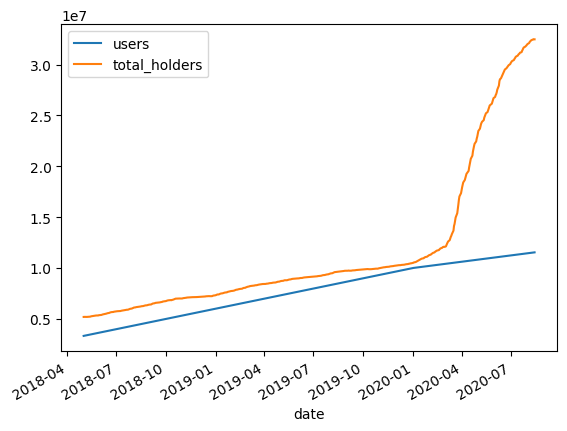

In [25]:
df_users[["date", "users", "total_holders"]].groupby("date").mean().plot(kind="line")

In [ ]:
df = df_merged
df["holders_rank"] = df.groupby("date")["holders"].rank(ascending=False)
#df = df[df["holders_rank"]<0.025*5221]

df["total_holders"] = df[["date", "holders"]].groupby("date")["holders"].transform("sum")

df

,date,ticker,holders,users,holders_adj,shrcd,vol,prc_adj,shrout_adj,mc,mc_retail,daily_change_holders,daily_holders,popularity,holders_rank
0,2018-05-02,A,590.000000,3.336986,176.806240,11.0,2240482.0,65.91,322477000.0,2.125446e+10,38886.900000,NaN,5.239962e+06,0.000113,1018.0
1,2018-05-03,A,586.473684,3.347945,175.174218,11.0,2365851.0,66.34,322477000.0,2.139312e+10,38906.664211,-3.526316,5.248722e+06,0.000112,1023.5
2,2018-05-04,A,587.458333,3.358904,174.895833,11.0,1331017.0,67.00,322477000.0,2.160596e+10,39359.708333,0.984649,5.246256e+06,0.000112,1026.0
3,2018-05-07,A,585.900000,3.391781,172.741115,11.0,1468735.0,67.39,322477000.0,2.173173e+10,39483.801000,-1.558333,5.236044e+06,0.000112,1029.0
4,2018-05-08,A,577.125000,3.402740,169.605978,11.0,1916103.0,67.37,322477000.0,2.172528e+10,38880.911250,-8.775000,5.242656e+06,0.000110,1046.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914450,2020-08-07,ZYNE,32151.291667,11.502732,2795.100416,11.0,542213.0,4.22,29255000.0,1.234561e+08,135678.450833,-78.916667,3.259810e+07,0.000986,171.0
2914451,2020-08-10,ZYNE,32060.833333,11.523224,2782.279787,11.0,584599.0,4.24,29255000.0,1.240412e+08,135937.933333,-90.458333,3.266178e+07,0.000982,170.0
2914452,2020-08-11,ZYNE,31939.875000,11.530055,2770.140818,11.0,449620.0,4.07,29255000.0,1.190679e+08,129995.291250,-120.958333,3.269811e+07,0.000977,171.0
2914453,2020-08-12,ZYNE,31851.578947,11.536885,2760.847340,11.0,980844.0,3.96,29255000.0,1.158498e+08,126132.252632,-88.296053,3.268230e+07,0.000975,171.0


In [5]:
df[["holders", "date"]].groupby("date").sum()

,holders
date,
2018-05-02,5.239962e+06
2018-05-03,5.248722e+06
2018-05-04,5.246256e+06
2018-05-07,5.236044e+06
2018-05-08,5.242656e+06
...,...
2020-08-07,3.259810e+07
2020-08-10,3.266178e+07
2020-08-11,3.269811e+07


In [ ]:
df_merged[["date", "holders"]].groupby("date").transform('sum')

,holders
0,5.239962e+06
1,5.248722e+06
2,5.246256e+06
3,5.236044e+06
4,5.242656e+06
...,...
2914450,3.259810e+07
2914451,3.266178e+07
2914452,3.269811e+07
2914453,3.268230e+07


In [ ]:
returns[["popularity", "date", "holders"]].groupby("date").sum()

,popularity,holders
date,,
2018-05-02,1.0,5.239962e+06
2018-05-03,1.0,5.248722e+06
2018-05-04,1.0,5.246256e+06
2018-05-07,1.0,5.236044e+06
2018-05-08,1.0,5.242656e+06
...,...,...
2020-08-07,1.0,3.259810e+07
2020-08-10,1.0,3.266178e+07
2020-08-11,1.0,3.269811e+07


## Claude

In [ ]:
from DataLoader import DataLoader

dl = DataLoader(handle_nans="drop")


Loading Robinhood data
Loading CRSP data
Merging...


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram
from tqdm.auto import tqdm

# Assuming your dataframe is loaded as returns
# First, let's create some time-based features

def calculate_features(returns):
    """Calculate engineered features from Robintrack data"""
    
    # Create a copy to avoid modifying the original
    data = returns.copy()
    
    # 1. Basic transformations
    # Normalize holder counts by users to get percentage
    data['holder_percentage'] = data['holders'] / data['users'] * 100
    
    # Calculate log returns of holders (better for analysis than raw changes)
    data['log_holder_change'] = np.log(data['holders'] / data['holders'].shift(1))
    
    # 2. Create groupby object for ticker-level operations
    grouped = data.groupby('ticker')
    
    # Create empty dataframes for ticker-level metrics
    ticker_metrics = []
    
    # 3. Calculate features for each ticker
    for ticker, group in tqdm(grouped, desc="Processing tickers"):
        # Sort by date
        group = group.sort_values('date')
        
        # Skip if not enough data
        if len(group) < 30:
            continue
            
        # Calculate time-based features
        group['holders_7d_pct_change'] = group['holders'].pct_change(periods=7)
        group['holders_30d_pct_change'] = group['holders'].pct_change(periods=30)
        
        # Volatility metrics
        group['holders_7d_std'] = group['holders'].rolling(7).std()
        group['holders_30d_std'] = group['holders'].rolling(30).std()
        group['holders_7d_cv'] = group['holders_7d_std'] / group['holders'].rolling(7).mean()
        
        # Momentum indicators
        group['holders_7d_ma'] = group['holders'].rolling(7).mean()
        group['holders_30d_ma'] = group['holders'].rolling(30).mean()
        group['ma_cross_signal'] = np.where(group['holders_7d_ma'] > group['holders_30d_ma'], 1, -1)
        
        # Acceleration (second derivative)
        group['holder_change_acceleration'] = group['daily_change_holders'].diff()
        
        # Relationship to price
        group['price_holder_corr_30d'] = group['holders'].rolling(30).corr(group['prc_adj'])
        
        # Calculate retail concentration
        group['retail_concentration'] = group['mc_retail'] / group['mc'] * 100
        
        # Identify trend strength using linear regression slope
        if len(group) >= 30:
            for window in [30, 90]:
                if len(group) >= window:
                    group[f'trend_strength_{window}d'] = group['holders'].rolling(window=window).apply(
                        lambda x: stats.linregress(np.arange(len(x)), x)[0] / np.mean(x), raw=True
                    )
        
        # Relative strength compared to overall market
        group = group.dropna(subset=['holders'])
        
        # Add back to the list
        ticker_metrics.append(group)
    
    # Combine all ticker data
    result = pd.concat(ticker_metrics)
    
    # Fill NaN values for calculated columns
    numeric_cols = result.select_dtypes(include=['float64']).columns
    result[numeric_cols] = result[numeric_cols].fillna(0)
    
    return result

# Function to create ticker-level summary metrics
def create_ticker_summary(returns):
    """Create a summary dataframe with one row per ticker"""
    # Group by ticker and calculate aggregate metrics
    with tqdm(total=1, desc="Creating ticker summary") as pbar:
        ticker_summary = returns.groupby('ticker').agg({
            'holders': ['mean', 'std', 'min', 'max'],
            'daily_change_holders': ['mean', 'std', 'min', 'max'],
            'prc_adj': ['mean', 'std', 'min', 'max'],
            'holder_percentage': ['mean', 'max'],
            'log_holder_change': ['mean', 'std'],
            'holders_7d_pct_change': ['mean', 'std', 'min', 'max'],
            'holders_30d_pct_change': ['mean', 'std'],
            'holders_7d_cv': 'mean',
            'price_holder_corr_30d': 'mean',
            'retail_concentration': 'mean',
            'trend_strength_30d': 'mean',
            'ma_cross_signal': 'mean'
        })
        
        # Flatten column names
        ticker_summary.columns = ['_'.join(col).strip() for col in ticker_summary.columns.values]
        
        # Add additional derived metrics
        ticker_summary['volatility_ratio'] = ticker_summary['holders_std'] / ticker_summary['holders_mean']
        ticker_summary['holder_range_ratio'] = ticker_summary['holders_max'] / ticker_summary['holders_min']
        pbar.update(1)
    
    return ticker_summary

# Function to identify pattern clusters
def identify_patterns(ticker_summary, n_clusters=6):
    """Identify patterns in the ticker summary data using clustering"""
    with tqdm(total=4, desc="Identifying patterns") as pbar:
        # Select features for clustering
        cluster_features = [
            'holders_mean', 'holders_std', 'daily_change_holders_mean', 
            'holders_7d_pct_change_mean', 'holders_7d_pct_change_std',
            'holders_7d_cv_mean', 'price_holder_corr_30d_mean', 
            'trend_strength_30d_mean', 'volatility_ratio', 'holder_range_ratio'
        ]
        
        # Get subset with features
        X = ticker_summary[cluster_features].copy()
        
        # Debug: Check for infinity and NaN values
        print("Checking for problematic values in features:")
        for col in X.columns:
            inf_count = np.isinf(X[col]).sum()
            nan_count = X[col].isna().sum()
            if inf_count > 0 or nan_count > 0:
                print(f"Column {col}: {inf_count} infinities, {nan_count} NaNs")
                
                # Replace infinities with NaNs, then fill with column median or 0
                X[col] = X[col].replace([np.inf, -np.inf], np.nan)
                if X[col].notna().sum() > 0:  # If there are non-NaN values
                    median_val = X[col].median()
                    X[col] = X[col].fillna(median_val)
                    print(f"  - Replaced with median: {median_val}")
                else:
                    X[col] = X[col].fillna(0)
                    print(f"  - Replaced with zeros")
        
        # Handle missing values and scaling
        X = X.fillna(0)
        
        # Additional safety check for any remaining infinities
        X = X.replace([np.inf, -np.inf], 0)
        
        # Debug: Verify all infinity and NaN values are gone
        inf_remaining = np.isinf(X).sum().sum()
        nan_remaining = X.isna().sum().sum()
        print(f"After fixing: {inf_remaining} infinities, {nan_remaining} NaNs remain")
        
        # Apply standard scaling
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        pbar.update(1)
        
        # PCA for dimensionality reduction
        pca = PCA(n_components=min(5, X.shape[1]))  # Ensure n_components doesn't exceed feature count
        X_pca = pca.fit_transform(X_scaled)
        pbar.update(1)
        
        # Perform KMeans clustering
        kmeans = KMeans(n_clusters=min(n_clusters, len(X)//10 + 1), random_state=42)  # Ensure reasonable number of clusters
        clusters = kmeans.fit_predict(X_pca)
        pbar.update(1)
        
        # Add cluster assignments back to the summary
        ticker_summary['pattern_cluster'] = clusters
        
        # Create feature importance per cluster
        cluster_centers = scaler.inverse_transform(pca.inverse_transform(kmeans.cluster_centers_))
        cluster_centers_df = pd.DataFrame(
            cluster_centers, 
            columns=cluster_features
        )
        pbar.update(1)
    
    return ticker_summary, cluster_centers_df, X_pca, pca


# Function to visualize patterns
def visualize_patterns(ticker_summary, X_pca, pca):
    """Create visualizations for the identified patterns"""
    with tqdm(total=2, desc="Creating visualizations") as pbar:
        # PCA scatter plot
        plt.figure(figsize=(16, 8))
        
        scatter = plt.scatter(
            X_pca[:, 0], X_pca[:, 1], 
            c=ticker_summary['pattern_cluster'], 
            cmap='viridis',
            alpha=0.6
        )
        
        plt.colorbar(scatter, label='Cluster')
        plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
        plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
        plt.title('Stock Patterns Based on Retail Holder Behavior')
        
        # Add annotations for a few notable stocks
        notable_tickers = ticker_summary.sort_values('holders_mean', ascending=False).head(20).index
        
        for ticker in notable_tickers:
            idx = ticker_summary.index.get_loc(ticker)
            plt.annotate(
                ticker, 
                (X_pca[idx, 0], X_pca[idx, 1]),
                fontsize=8
            )
        
        plt.tight_layout()
        pbar.update(1)
        
        # Create a heatmap of cluster characteristics
        cluster_profile = ticker_summary.groupby('pattern_cluster').mean()
        
        # Select key metrics for heatmap
        profile_cols = [
            'holders_mean', 'holders_7d_pct_change_mean', 
            'holders_7d_cv_mean', 'price_holder_corr_30d_mean',
            'volatility_ratio', 'trend_strength_30d_mean'
        ]
        
        plt.figure(figsize=(14, 6))
        sns.heatmap(
            cluster_profile[profile_cols].T,
            cmap='viridis',
            center=0,
            annot=True,
            fmt='.5f'
        )
        plt.title('Cluster Characteristics')
        plt.tight_layout()
        pbar.update(1)
    
    return notable_tickers, cluster_profile

# Main workflow
def main_analysis(df):
    """Main analysis workflow"""
    # Calculate features
    print("Step 1: Calculating features...")
    features_df = calculate_features(df)
    
    # Create ticker summary
    print("Step 2: Creating ticker summary...")
    ticker_summary = create_ticker_summary(features_df)
    
    # Identify patterns
    print("Step 3: Identifying patterns...")
    ticker_summary, cluster_centers, X_pca, pca = identify_patterns(ticker_summary)
    
    # Visualize patterns
    print("Step 4: Visualizing patterns...")
    notable_tickers, cluster_profile = visualize_patterns(ticker_summary, X_pca, pca)
    
    # Create time series plots for representative tickers
    # Get representative tickers for each cluster
    print("Step 5: Finding representative tickers for each pattern...")
    representative_tickers = []
    
    for cluster in tqdm(range(len(cluster_profile)), desc="Finding representative tickers"):
        # Get top 3 stocks most central to the cluster
        cluster_stocks = ticker_summary[ticker_summary['pattern_cluster'] == cluster]
        
        if len(cluster_stocks) >= 3:
            representative_tickers.append(cluster_stocks.index[:3].tolist())
        else:
            representative_tickers.append(cluster_stocks.index.tolist())
    
    # Flatten the list of representative tickers
    representative_tickers = [ticker for sublist in representative_tickers for ticker in sublist]
    
    print(f"Analysis complete. Found {len(cluster_profile)} distinct patterns.")
    
    return features_df, ticker_summary, cluster_profile, representative_tickers

# Function to analyze specific patterns
def analyze_pattern(features_df, ticker_symbol, window_size=90):
    """Analyze patterns for a specific ticker"""
    with tqdm(total=1, desc=f"Analyzing {ticker_symbol}") as pbar:
        ticker_data = features_df[features_df['ticker'] == ticker_symbol].sort_values('date')
        
        if len(ticker_data) < window_size:
            return f"Not enough data for {ticker_symbol}"
        
        # Create figure with subplots
        fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)
        
        # Plot 1: Holders and Price
        ax1 = axes[0]
        ax1.set_title(f'{ticker_symbol} - Popularity Holders and Price')
        ax1.plot(ticker_data['date'], ticker_data['popularity'], 'b-', label='popularity')
        ax1.set_ylabel('Number of Holders', color='b')
        ax1.tick_params(axis='y', labelcolor='b')
        
        ax1b = ax1.twinx()
        ax1b.plot(ticker_data['date'], ticker_data['prc_adj'], 'r-', label='Price')
        ax1b.set_ylabel('Price ($)', color='r')
        ax1b.tick_params(axis='y', labelcolor='r')
        
        # Plot 2: Holder Percentage and Moving Averages
        ax2 = axes[1]
        ax2.set_title(f'{ticker_symbol} - Holder Percentage and Moving Averages')
        ax2.plot(ticker_data['date'], ticker_data['holder_percentage'], 'g-', label='Holder %')
        
        ax2b = ax2.twinx()        
        ax2b.plot(ticker_data['date'], ticker_data['holders_7d_ma'], 'b--', label='7-day MA')
        ax2b.plot(ticker_data['date'], ticker_data['holders_30d_ma'], 'r--', label='30-day MA')
        ax2b.set_ylabel('Holder % and MAs')
        ax2b.legend()
        
        # Plot 3: Holder Changes and Price-Holder Correlation
        ax3 = axes[2]
        ax3.set_title(f'{ticker_symbol} - Holder Changes and Price Correlation')
        ax3.plot(ticker_data['date'], ticker_data['daily_change_holders'], 'b-', label='Daily Holder Change')
        ax3.set_ylabel('Daily Change', color='b')
        ax3.tick_params(axis='y', labelcolor='b')
        
        ax3b = ax3.twinx()
        ax3b.plot(ticker_data['date'], ticker_data['price_holder_corr_30d'], 'r-', label='Price-Holder Correlation (30d)')
        ax3b.set_ylabel('Correlation', color='r')
        ax3b.tick_params(axis='y', labelcolor='r')
        ax3b.axhline(y=0, color='k', linestyle='-', alpha=0.3)
        
        plt.tight_layout()
        pbar.update(1)
    
    return fig

Step 1: Calculating features...


Processing tickers: 100%|██████████| 5221/5221 [07:09<00:00, 12.16it/s]


Step 2: Creating ticker summary...


Creating ticker summary: 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]


Step 3: Identifying patterns...


Identifying patterns:   0%|          | 0/4 [00:00<?, ?it/s]

Checking for problematic values in features:
Column holders_7d_pct_change_mean: 15 infinities, 0 NaNs
  - Replaced with median: 0.019217150423497857
Column holders_7d_pct_change_std: 0 infinities, 15 NaNs
  - Replaced with median: 0.06981853059187276
Column price_holder_corr_30d_mean: 65 infinities, 432 NaNs
  - Replaced with median: 0.0019741669561145147
Column holder_range_ratio: 21 infinities, 0 NaNs
  - Replaced with median: 4.491089998109283
After fixing: 0 infinities, 0 NaNs remain


Identifying patterns: 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]


Step 4: Visualizing patterns...


Creating visualizations: 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]


Step 5: Finding representative tickers for each pattern...


Finding representative tickers: 100%|██████████| 6/6 [00:00<00:00, 1002.82it/s]


Analysis complete. Found 6 distinct patterns.


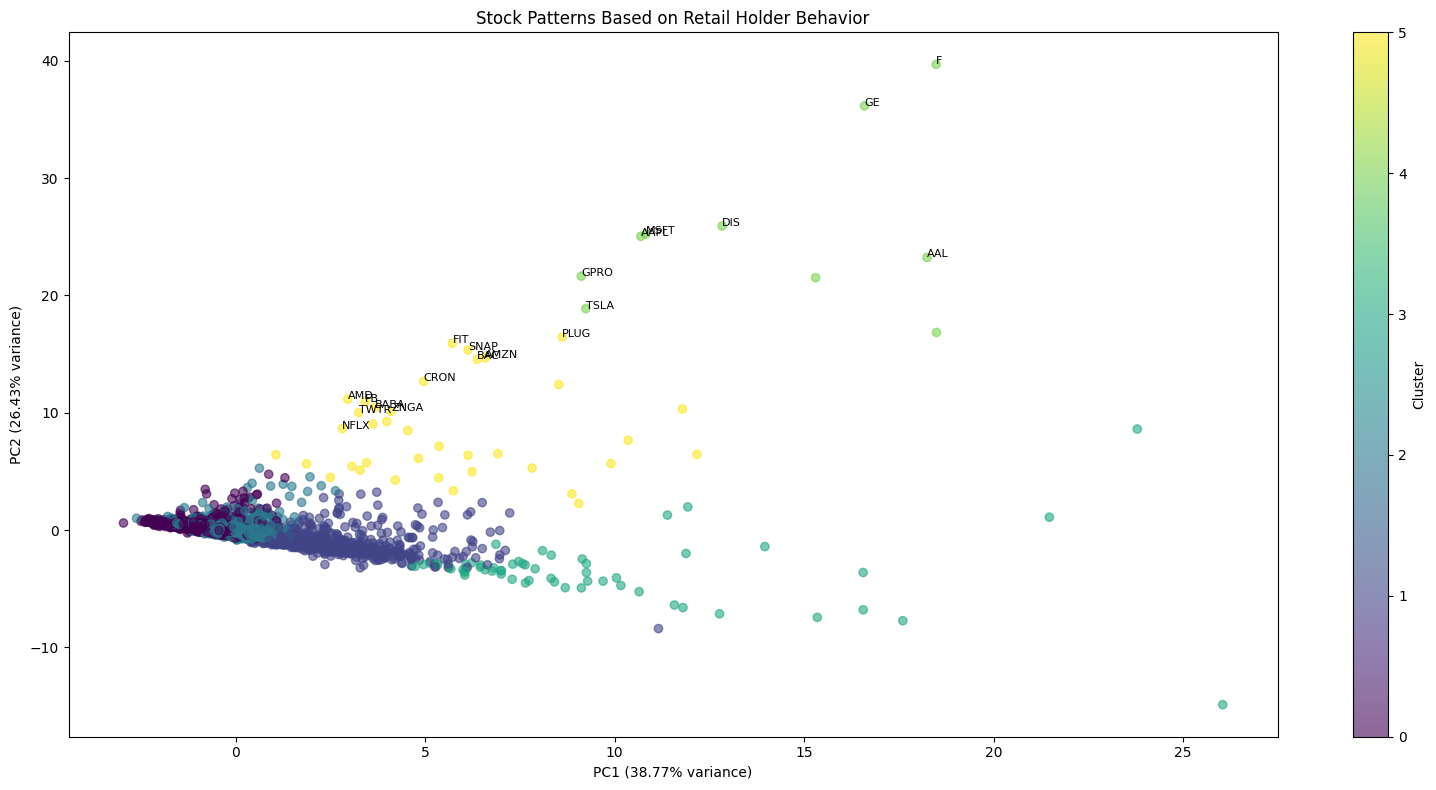

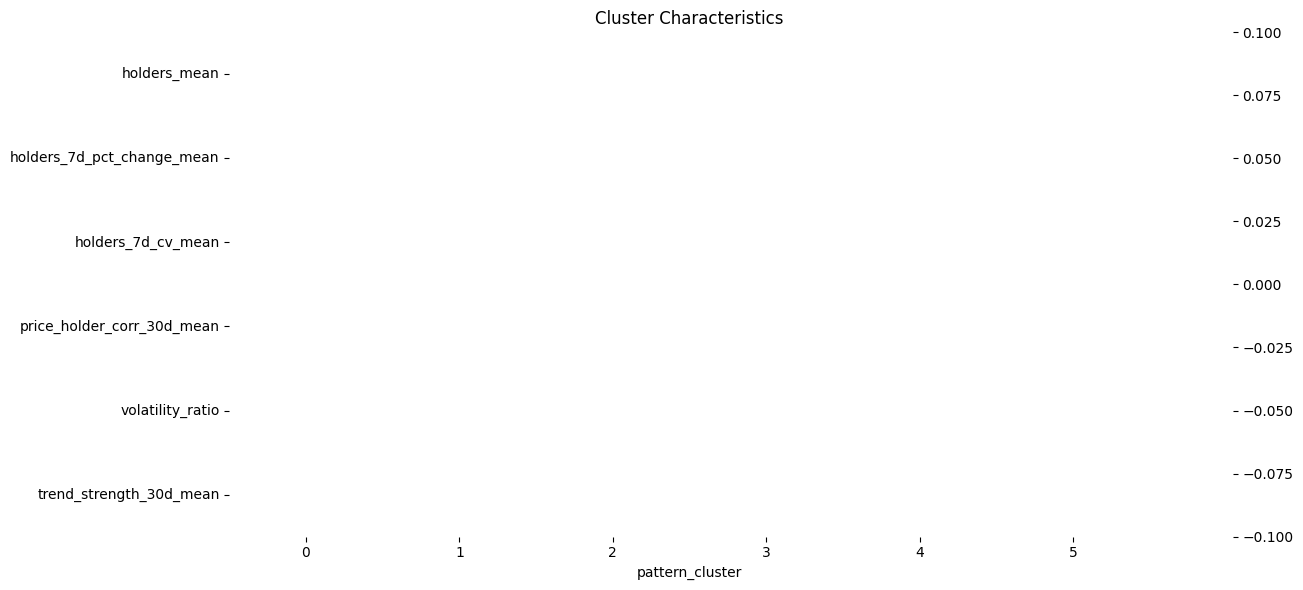

In [10]:

res = main_analysis(df)



In [15]:
figure = analyze_pattern(res[0], "TSLA")

NameError: name 'res' is not defined

In [12]:
df[["popularity", "date", "holders"]].groupby("date").sum()

,popularity,holders
date,,
2018-05-02,1.0,5.239962e+06
2018-05-03,1.0,5.248722e+06
2018-05-04,1.0,5.246256e+06
2018-05-07,1.0,5.236044e+06
2018-05-08,1.0,5.242656e+06
...,...,...
2020-08-07,1.0,3.259810e+07
2020-08-10,1.0,3.266178e+07
2020-08-11,1.0,3.269811e+07


### Popularity

Computed as:
\begin{equation*}
    \text{Pop}_{i,d} = \dfrac{N_{i,d}}{\sum_iN_{i,d}}  
\end{equation*}

it is the popularity of stock $i$ in day $d$, where $N$ is the number of open positions

In [ ]:
from DataLoader import DataLoader
import numpy as np

dl = DataLoader(handle_nans="drop")

df = dl.merge_dfs()

Loading Robinhood data
Loading CRSP data
Loading merged df


In [10]:
df["popularity_change"] = df.groupby("ticker")["popularity"].pct_change()
df = df.replace(np.inf, np.nan)
df = df.dropna()
df.sort_values(by=["popularity_change", "date"], ascending=[True, False][::-1])

,date,ticker,holders,users,holders_adj,shrcd,vol,prc_adj,shrout_adj,mc,mc_retail,daily_change_holders,daily_holders,popularity,popularity_change
1350065,2020-03-09,IGOV,1008.958333,10.471311,96.354534,73.0,296058.0,53.09000,16750000.0,8.892575e+08,53565.597917,973.250000,1.282694e+07,0.000079,26.952362
1373475,2018-05-03,IMTE,835.750000,3.347945,249.630728,12.0,858722.0,32.11000,2644000.0,8.489884e+07,26835.932500,805.750000,5.248722e+06,0.000159,26.811834
406075,2020-03-17,CCNE,413.222222,10.525956,39.257452,11.0,159000.0,21.53000,15248000.0,3.282894e+08,8896.674444,380.830918,1.423457e+07,0.000029,11.341286
2604561,2020-04-21,TSC,821.333333,10.765027,76.296447,11.0,1784117.0,12.91000,29763000.0,3.842403e+08,10603.413333,746.159420,2.160872e+07,0.000038,9.718071
320167,2018-05-03,BOXL,519.238095,3.347945,155.091575,11.0,2010766.0,8.33000,9648000.0,8.036784e+07,4325.253333,463.238095,5.248722e+06,0.000099,8.256632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1917334,2019-09-16,NWLI,0.000000,8.838356,0.000000,11.0,4104.0,280.04999,3436000.0,9.622518e+08,0.000000,-0.625000,9.831534e+06,0.000000,-1.000000
996741,2019-10-17,FMK,0.000000,9.178082,0.000000,73.0,13959.0,36.30000,600000.0,2.178000e+07,0.000000,-0.583333,9.947153e+06,0.000000,-1.000000
996753,2019-11-04,FMK,0.000000,9.375342,0.000000,73.0,630.0,37.19000,650000.0,2.417350e+07,0.000000,-0.625000,1.007581e+07,0.000000,-1.000000
1099450,2020-01-16,GEC,0.000000,10.109290,0.000000,11.0,7702.0,3.10000,25411000.0,7.877410e+07,0.000000,-61.000000,1.096158e+07,0.000000,-1.000000


In [14]:
df[df["ticker"]=="IGOV"]

,date,ticker,holders,users,holders_adj,shrcd,vol,prc_adj,shrout_adj,mc,mc_retail,daily_change_holders,daily_holders,popularity,holders_rank,popularity_change
1349613,2018-05-03,IGOV,25.000000,3.347945,7.467267,73.0,275270.0,50.12,22700000.0,1.137724e+09,1253.000000,0.000000,5.248722e+06,0.000005,4252.5,-0.001669
1349614,2018-05-04,IGOV,25.000000,3.358904,7.442904,73.0,161930.0,49.97,22700000.0,1.134319e+09,1249.250000,0.000000,5.246256e+06,0.000005,4254.0,0.000470
1349615,2018-05-07,IGOV,25.000000,3.391781,7.370759,73.0,132429.0,49.89,22700000.0,1.132503e+09,1247.250000,0.000000,5.236044e+06,0.000005,4260.5,0.001950
1349616,2018-05-08,IGOV,25.125000,3.402740,7.383756,73.0,157751.0,49.59,22700000.0,1.125693e+09,1245.948750,0.125000,5.242656e+06,0.000005,4243.0,0.003732
1349617,2018-05-09,IGOV,25.416667,3.413699,7.445492,73.0,103023.0,49.61,22650000.0,1.123666e+09,1260.920833,0.291667,5.249612e+06,0.000005,4237.5,0.010268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350171,2020-08-07,IGOV,754.916667,11.502732,65.629335,73.0,147147.0,53.35,17700000.0,9.442950e+08,40274.804167,-5.916667,3.259810e+07,0.000023,2214.0,-0.009422
1350172,2020-08-10,IGOV,746.875000,11.523224,64.814760,73.0,91707.0,53.30,17700000.0,9.434100e+08,39808.437500,-8.041667,3.266178e+07,0.000023,2227.0,-0.012581
1350173,2020-08-11,IGOV,740.958333,11.530055,64.263211,73.0,120379.0,53.07,17700000.0,9.393390e+08,39322.658750,-5.916667,3.269811e+07,0.000023,2238.0,-0.009024
1350174,2020-08-12,IGOV,738.105263,11.536885,63.977863,73.0,91276.0,53.07,17800000.0,9.446460e+08,39171.246316,-2.853070,3.268230e+07,0.000023,2241.0,-0.003369


In [53]:
df_covid = df[df["date"] > "2020-02-01"]

# Rank stocks by popularity within each date (lower rank = more popular)
df_covid["popularity_rank"] = df_covid.groupby("date")["popularity"].rank(ascending=False)

# Sort: First by date (ascending), then by popularity rank (ascending, because 1 is the most popular)
df_covid = df_covid.sort_values(["date", "popularity_rank"], ascending=[True, True])

# Get the top 10 most popular per date
df_top = df_covid.groupby("date").head(10)

df_top

,date,ticker,holders,users,holders_adj,shrcd,vol,prc_adj,shrout_adj,mc,mc_retail,daily_change_holders,daily_holders,popularity,popularity_change,popularity_rank
900341,2020-02-03,F,340626.458333,10.232240,33289.528371,11.0,71432659.0,8.98000,3.894045e+09,3.496852e+10,3.058826e+06,1380.666667,11393816.50,0.029896,-0.000067,1.0
1098897,2020-02-03,GE,318538.666667,10.232240,31130.881709,11.0,50399270.0,12.26000,8.733549e+09,1.070733e+11,3.905284e+06,-172.583333,11393816.50,0.027957,-0.004659,2.0
1766470,2020-02-03,MSFT,277862.041667,10.232240,27155.542657,11.0,30077416.0,174.38000,7.606047e+09,1.326342e+12,4.845358e+07,1155.083333,11393816.50,0.024387,0.000037,3.0
1157867,2020-02-03,GPRO,269468.125000,10.232240,26335.202603,11.0,4214487.0,4.09000,1.270990e+08,5.198349e+08,1.102125e+06,1354.458333,11393816.50,0.023650,0.000911,4.0
968326,2020-02-03,FIT,262845.291667,10.232240,25687.951068,11.0,5773839.0,6.53000,2.336930e+08,1.526015e+09,1.716380e+06,106.125000,11393816.50,0.023069,-0.003718,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669848,2020-08-13,DIS,598965.400000,11.543716,51886.706840,11.0,6468610.0,130.96001,1.806267e+09,2.365487e+11,7.844051e+07,-1146.389474,32683149.35,0.018326,-0.001936,6.0
624802,2020-08-13,DAL,572753.800000,11.543716,49616.068828,11.0,15767696.0,28.70000,6.378570e+08,1.830650e+10,1.643803e+07,-359.094737,32683149.35,0.017524,-0.000653,7.0
2607461,2020-08-13,TSLA,563436.900000,11.543716,48808.971692,11.0,20387865.0,1621.00000,1.863620e+08,3.020928e+11,9.133312e+08,15034.478947,32683149.35,0.017239,0.027388,8.0
403923,2020-08-13,CCL,481811.050000,11.543716,41737.951314,72.0,21416142.0,15.22000,6.006630e+08,9.142091e+09,7.333164e+06,-726.423684,32683149.35,0.014742,-0.001531,9.0


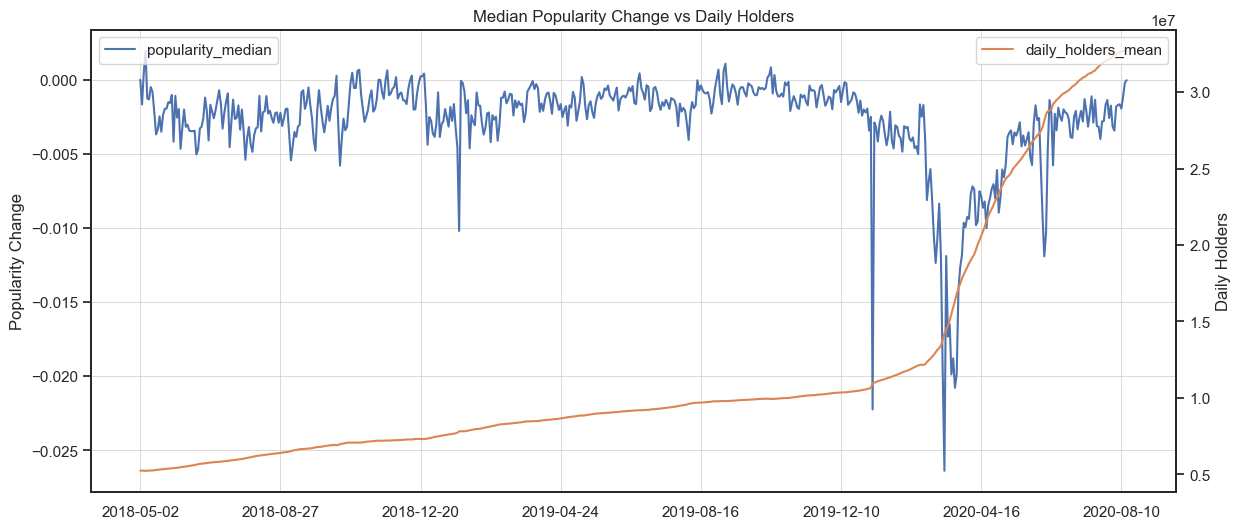

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


df_plot = df[["date", "total_holders", "popularity_change"]].groupby("date").agg({
    "total_holders":"mean",
    "popularity_change":("mean", "median", "sum", "skew", "max")
})
        


# Apply Seaborn styling
sns.set_style("white")

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 6))
ax.set_title('Median Popularity Change vs Daily Holders')

# Define colors using the Seaborn palette
colors = sns.color_palette()

# Plot popularity change with first color
ax.plot(df_plot.index, df_plot[('popularity_change', 'median')], color=colors[0], label='popularity_median')

# Set labels
ax.set_ylabel('Popularity Change')

# Reduce number of x-ticks for better readability
ax.xaxis.set_major_locator(plt.MaxNLocator(8))

# Reduce number of vertical grid lines
ax.grid(True, which='major', linestyle='-', linewidth=0.5)
ax.grid(False, which='minor')

# Create a secondary y-axis for daily holders with second color
ax2 = ax.twinx()
ax2.plot(df_plot.index, df_plot[('daily_holders', 'mean')], color=colors[1], label='daily_holders_mean')

# Set secondary axis label
ax2.set_ylabel('Daily Holders')

# Add legends
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.show()


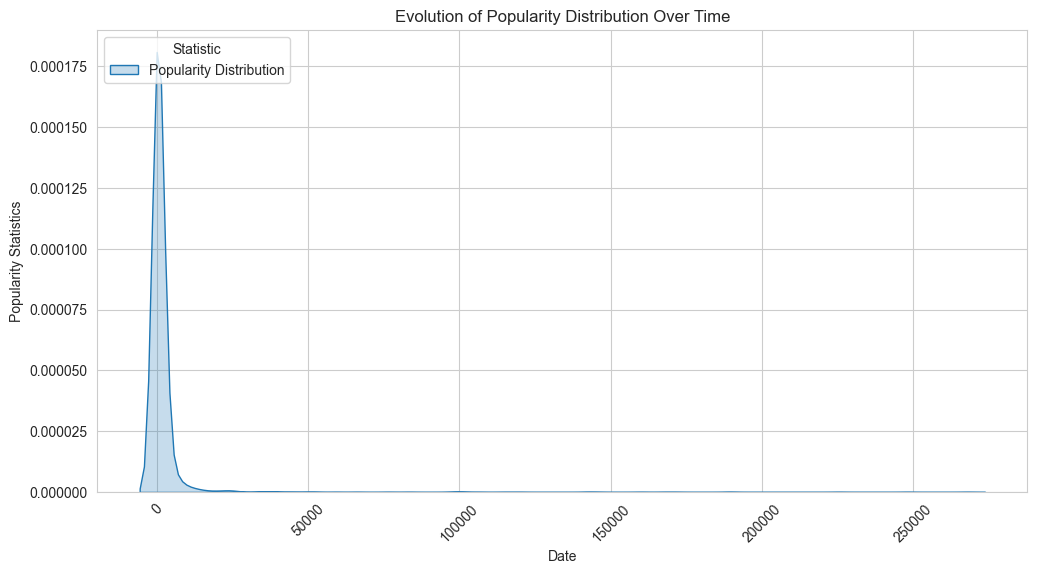

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


df = df_merged


# Set Seaborn style
sns.set_style("whitegrid")

# Create a figure and axis
fig = plt.figure(figsize=(12, 6))  # Use plt.subplots() instead of plt.figure()

# Plot key distribution moments on ax
#sns.lineplot(data=popularity_stats, x=popularity_stats.index, y="skew", label="skew", ax=ax)
sns.kdeplot(data=df[df["date"]=="05-02-2019"]["holders"], label="Popularity Distribution", fill=True)


# Formatting
plt.xlabel("Date")
plt.ylabel("Popularity Statistics")
plt.title("Evolution of Popularity Distribution Over Time")
plt.legend(title="Statistic", loc="upper left")
plt.xticks(rotation=45)
#plt.xscale("log")

# Show plot
plt.show()


## Distribution of Returns

#### Main Problems
**Facts**
> In December 12, 2019, Robinhood introduced fractional share trading on its platform
- I don't know how many stocks each position holds, BUT i know that fractional investments are possible.
    - I can assume that the amount of money invested in each stock is normally distributed and i.i.d. for each stock
    - However, I will never know if someone has sold 99.9% of their position in a certain stock 
- The number of total active users incresed significantly after the early-2020 covid crash

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src import Analyzer

an = Analyzer(compare_tickers=["VOO", "VT"])



Loading Robinhood data
Loading CRSP data
Merging...


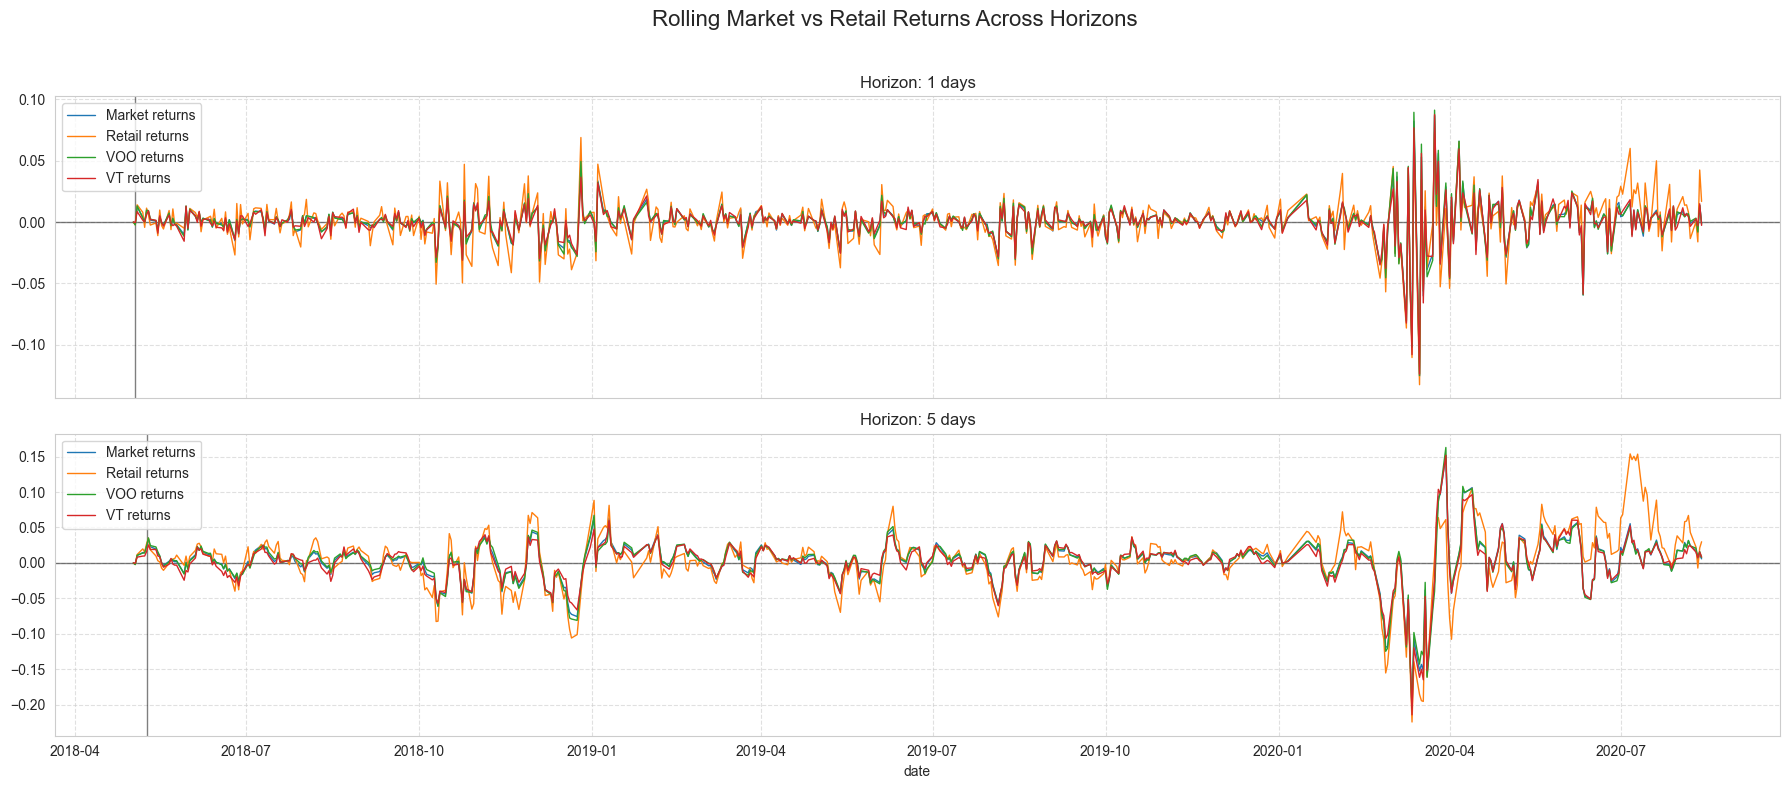

In [21]:
an.plot_returns_timeseries(returns_kwargs={"horizons":[1, 5], "start_date":None, "cumulative":False})

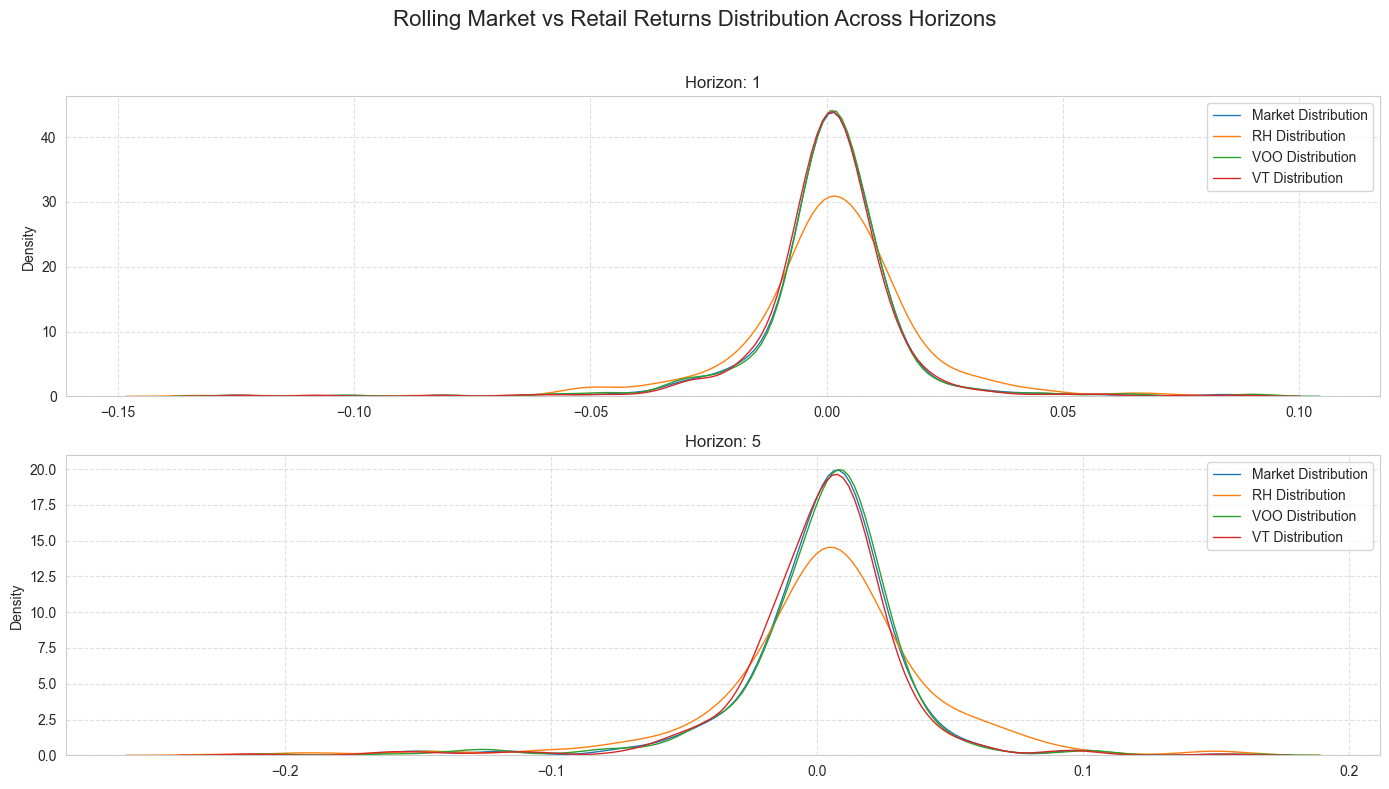

In [29]:
an.plot_returns_kdes(returns_kwargs={"horizons":[1, 5], "start_date":None, "cumulative":False})

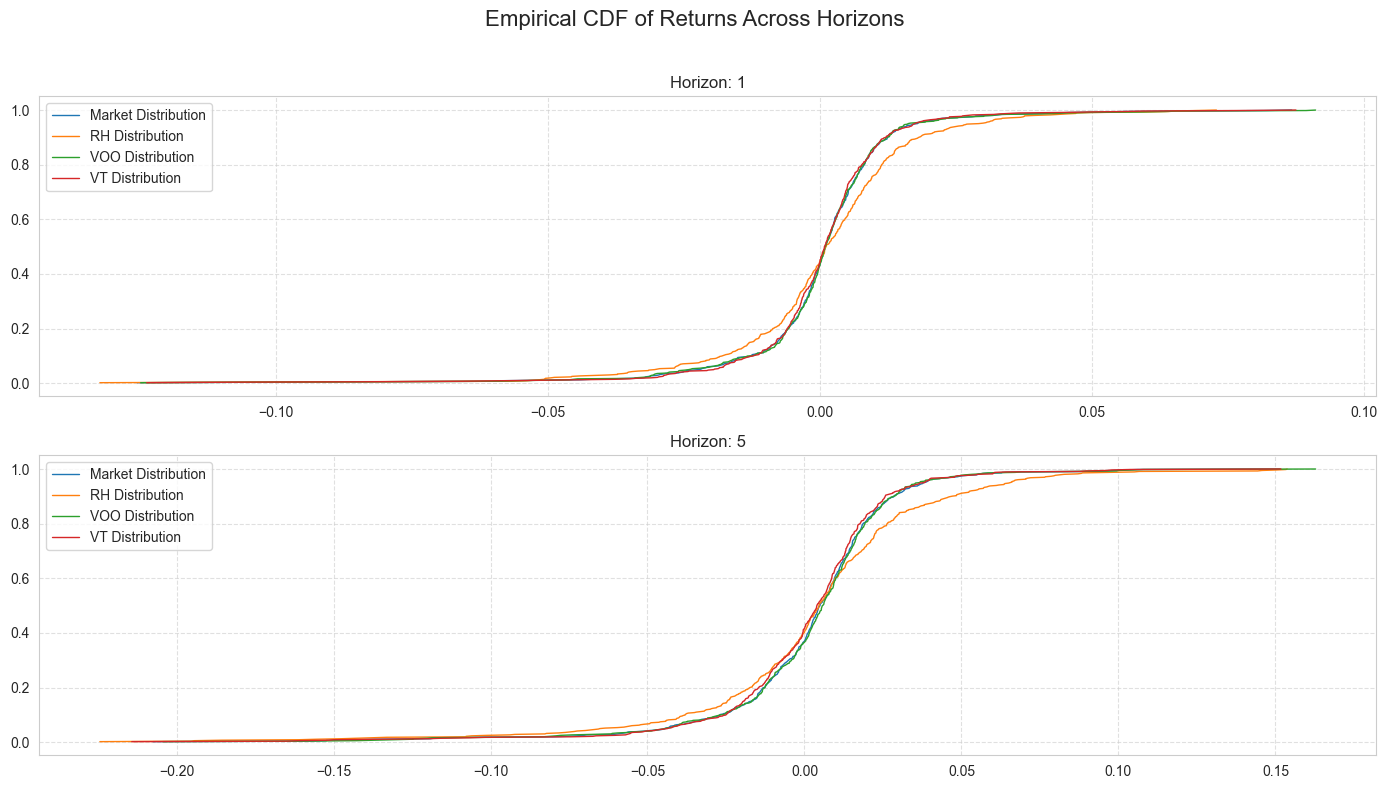

In [37]:
an.plot_returns_cdfs(returns_kwargs={"horizons":[1, 5], "start_date":None, "cumulative":False})

In [22]:
ret = an.build_returns(**{"horizons":[1, 5], "start_date":None, "cumulative":False})[0]
cols_to_keep = [col for col in ret.columns if col.endswith("return")]
ret = ret[cols_to_keep]
ret.corr()

,rh_portfolio_1_return,mc_1_return,VOO_1_return,VT_1_return,rh_portfolio_5_return,mc_5_return,VOO_5_return,VT_5_return
rh_portfolio_1_return,1.000000,0.900399,0.886910,0.880494,0.478771,0.411949,0.401476,0.408636
mc_1_return,0.900399,1.000000,0.995627,0.988253,0.383138,0.433199,0.424912,0.434588
VOO_1_return,0.886910,0.995627,1.000000,0.982514,0.371127,0.424104,0.419296,0.424098
VT_1_return,0.880494,0.988253,0.982514,1.000000,0.373093,0.426332,0.416182,0.438276
rh_portfolio_5_return,0.478771,0.383138,0.371127,0.373093,1.000000,0.857992,0.841922,0.838266
mc_5_return,0.411949,0.433199,0.424104,0.426332,0.857992,1.000000,0.995161,0.987929
VOO_5_return,0.401476,0.424912,0.419296,0.416182,0.841922,0.995161,1.000000,0.978795
VT_5_return,0.408636,0.434588,0.424098,0.438276,0.838266,0.987929,0.978795,1.000000


In [23]:
ret.describe().T

,count,mean,std,min,25%,50%,75%,max
rh_portfolio_1_return,564.0,0.000719,0.018809,-0.132368,-0.006164,0.001141,0.009484,0.072851
mc_1_return,564.0,0.000396,0.015470,-0.125496,-0.003944,0.001012,0.006481,0.086673
VOO_1_return,564.0,0.000438,0.015806,-0.124870,-0.003874,0.000942,0.006632,0.091087
VT_1_return,564.0,0.000184,0.015092,-0.123763,-0.004568,0.000842,0.005926,0.087470
rh_portfolio_5_return,564.0,0.003309,0.041768,-0.224427,-0.012162,0.004643,0.022078,0.153755
mc_5_return,564.0,0.001940,0.031094,-0.207508,-0.008577,0.004961,0.016049,0.151511
VOO_5_return,564.0,0.002152,0.030933,-0.204425,-0.009377,0.005838,0.016464,0.162820
VT_5_return,564.0,0.000864,0.030673,-0.214262,-0.010938,0.003977,0.014857,0.151788


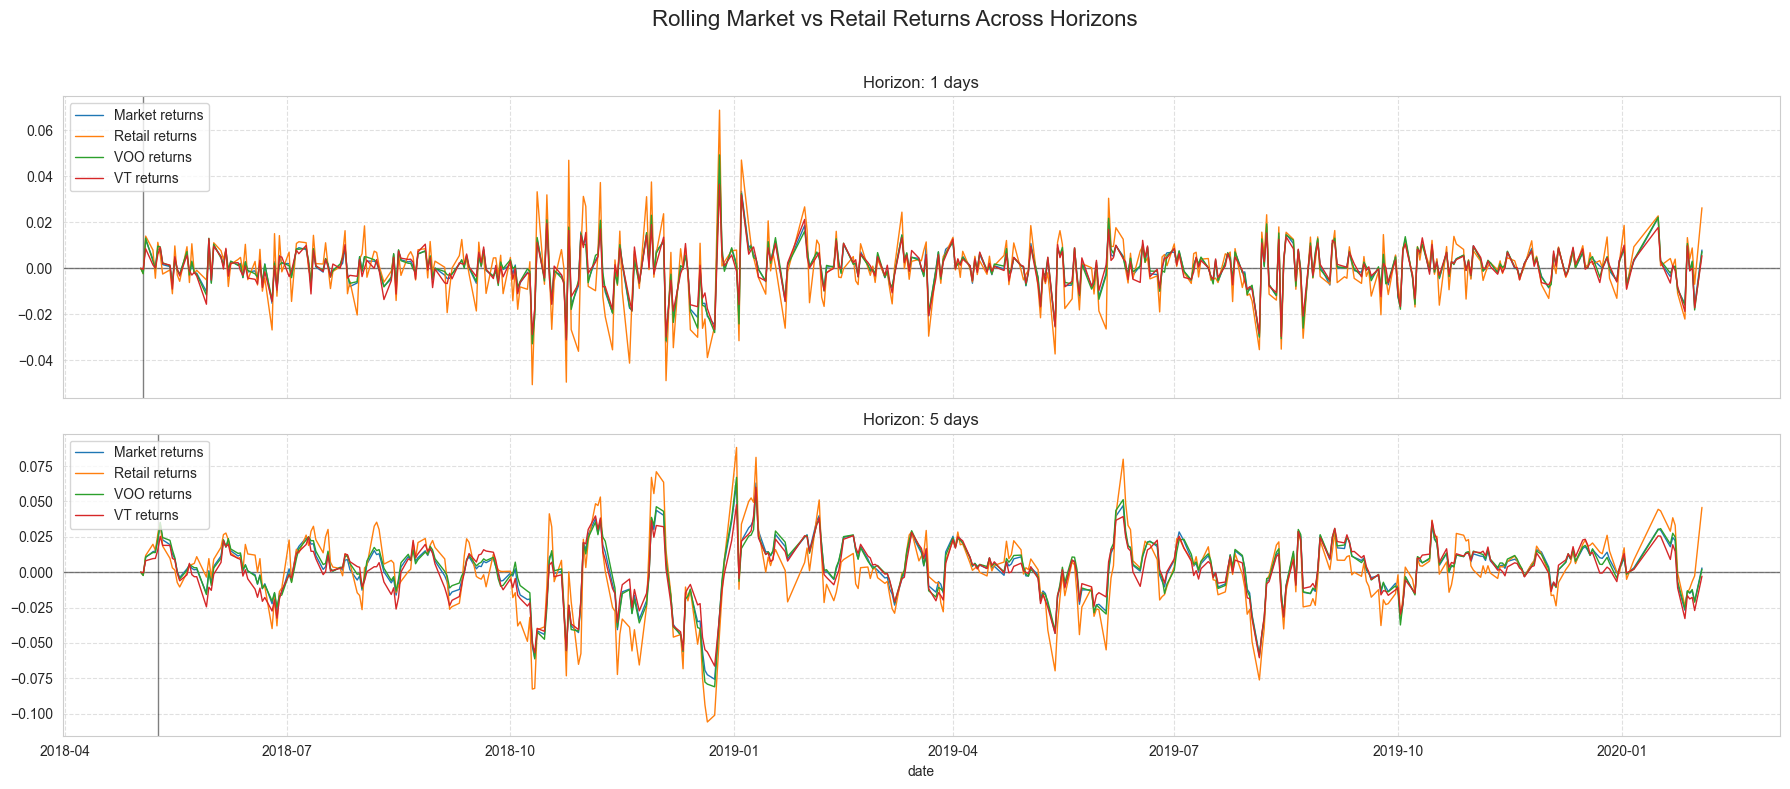

In [24]:
an.plot_returns_timeseries(returns_kwargs={"horizons":[1, 5], "start_date":None, "end_date":"2020-02-03", "cumulative":False})

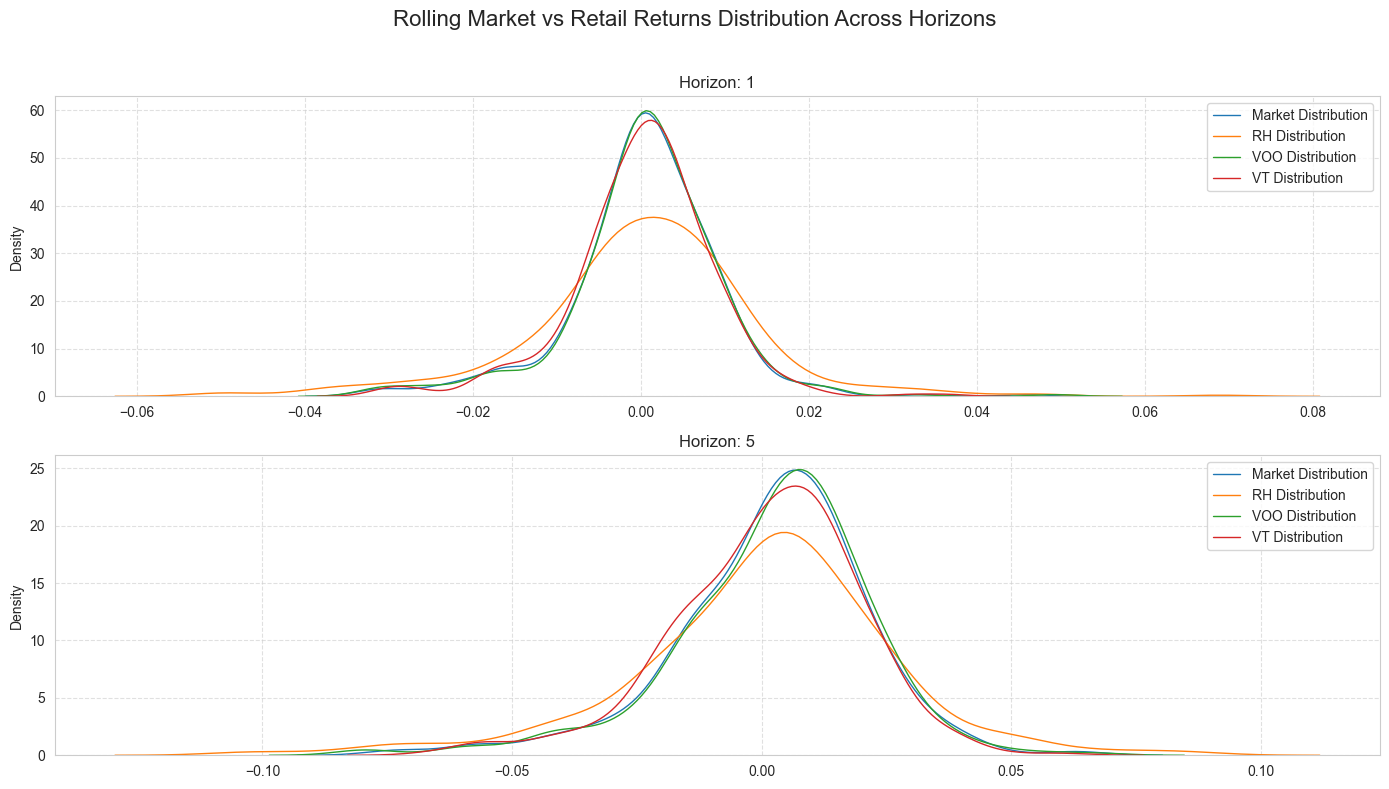

In [30]:
an.plot_returns_kdes(returns_kwargs={"horizons":[1, 5], "start_date":None, "end_date":"2020-02-03", "cumulative":False})

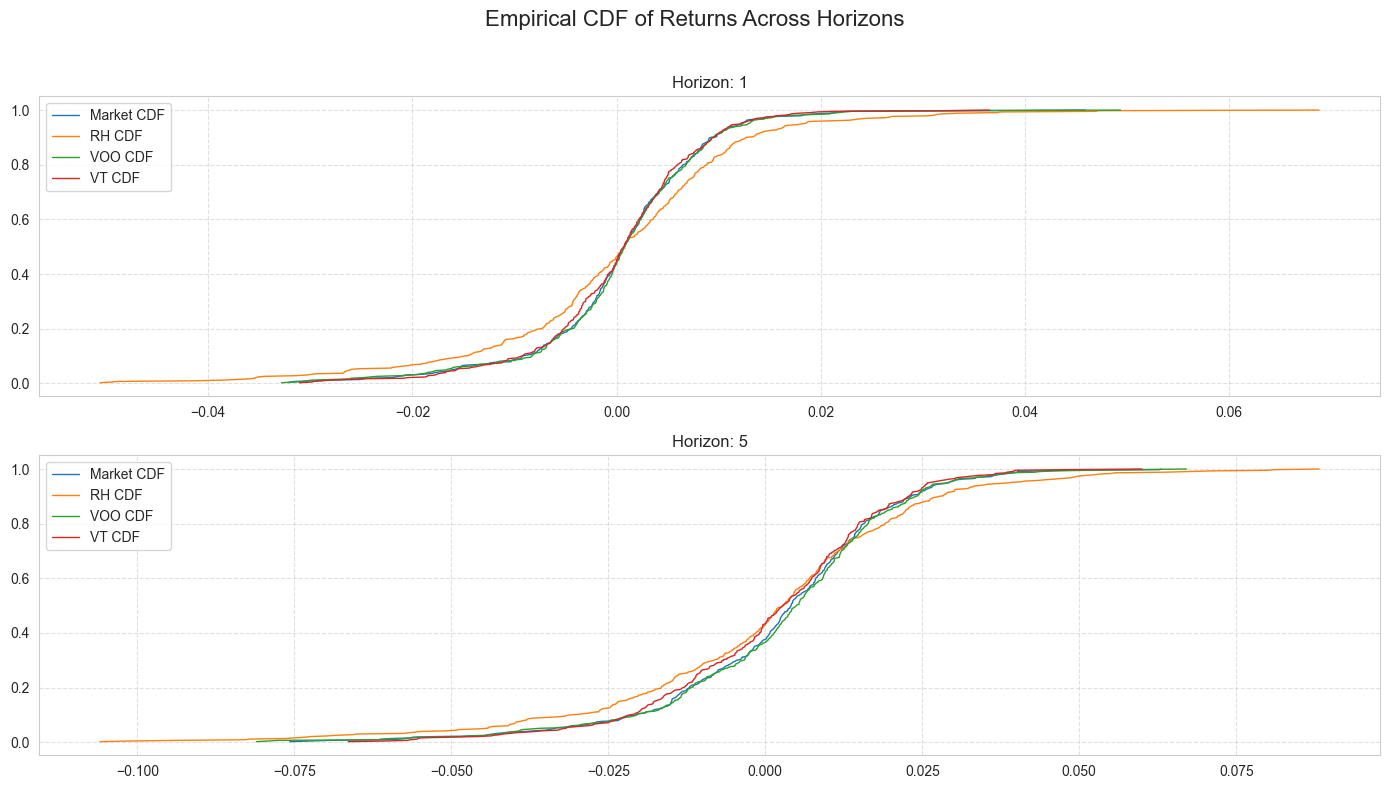

In [55]:
an.plot_returns_cdfs(returns_kwargs={"horizons":[1, 5], "start_date":None, "end_date":"2020-02-03", "cumulative":False})

In [40]:
ret = an.build_returns(**{"horizons":[1, 5], "start_date":None, "end_date":"2020-02-03", "cumulative":False})[0]
cols_to_keep = [col for col in ret.columns if col.endswith("return")]

ret.corr()

,rh_portfolio,mc,VOO,VT,rh_portfolio_1_return,mc_1_return,VOO_1_return,VT_1_return,rh_portfolio_5_return,mc_5_return,VOO_5_return,VT_5_return
rh_portfolio,1.000000,0.914004,0.897090,0.875704,1.000000,0.914004,0.897090,0.875704,0.421217,0.368392,0.353318,0.360719
mc,0.914004,1.000000,0.992055,0.973848,0.914004,1.000000,0.992055,0.973848,0.428630,0.445551,0.428800,0.442908
VOO,0.897090,0.992055,1.000000,0.966011,0.897090,0.992055,1.000000,0.966011,0.429004,0.447996,0.437302,0.443307
VT,0.875704,0.973848,0.966011,1.000000,0.875704,0.973848,0.966011,1.000000,0.398605,0.431785,0.415299,0.454282
rh_portfolio_1_return,1.000000,0.914004,0.897090,0.875704,1.000000,0.914004,0.897090,0.875704,0.421217,0.368392,0.353318,0.360719
mc_1_return,0.914004,1.000000,0.992055,0.973848,0.914004,1.000000,0.992055,0.973848,0.428630,0.445551,0.428800,0.442908
VOO_1_return,0.897090,0.992055,1.000000,0.966011,0.897090,0.992055,1.000000,0.966011,0.429004,0.447996,0.437302,0.443307
VT_1_return,0.875704,0.973848,0.966011,1.000000,0.875704,0.973848,0.966011,1.000000,0.398605,0.431785,0.415299,0.454282
rh_portfolio_5_return,0.421217,0.428630,0.429004,0.398605,0.421217,0.428630,0.429004,0.398605,1.000000,0.921439,0.909939,0.868526
mc_5_return,0.368392,0.445551,0.447996,0.431785,0.368392,0.445551,0.447996,0.431785,0.921439,1.000000,0.993139,0.972290


In [31]:
desc = ret.describe().T
desc

,count,mean,std,min,25%,50%,75%,max
rh_portfolio_1_return,430.0,0.000115,0.013490,-0.050597,-0.005461,0.000809,0.007377,0.068808
mc_1_return,430.0,0.000419,0.008745,-0.032113,-0.003126,0.000804,0.005285,0.045916
VOO_1_return,430.0,0.000485,0.008928,-0.032828,-0.003066,0.000757,0.005096,0.049350
VT_1_return,430.0,0.000198,0.008361,-0.031068,-0.003794,0.000716,0.004853,0.036545
rh_portfolio_5_return,430.0,0.000325,0.026448,-0.105948,-0.013005,0.002922,0.014899,0.088194
mc_5_return,430.0,0.002125,0.019319,-0.075729,-0.008090,0.004110,0.014121,0.063052
VOO_5_return,430.0,0.002471,0.019711,-0.081061,-0.008104,0.004981,0.014387,0.067072
VT_5_return,430.0,0.001062,0.018533,-0.066412,-0.010597,0.002804,0.013172,0.060003


np.True_

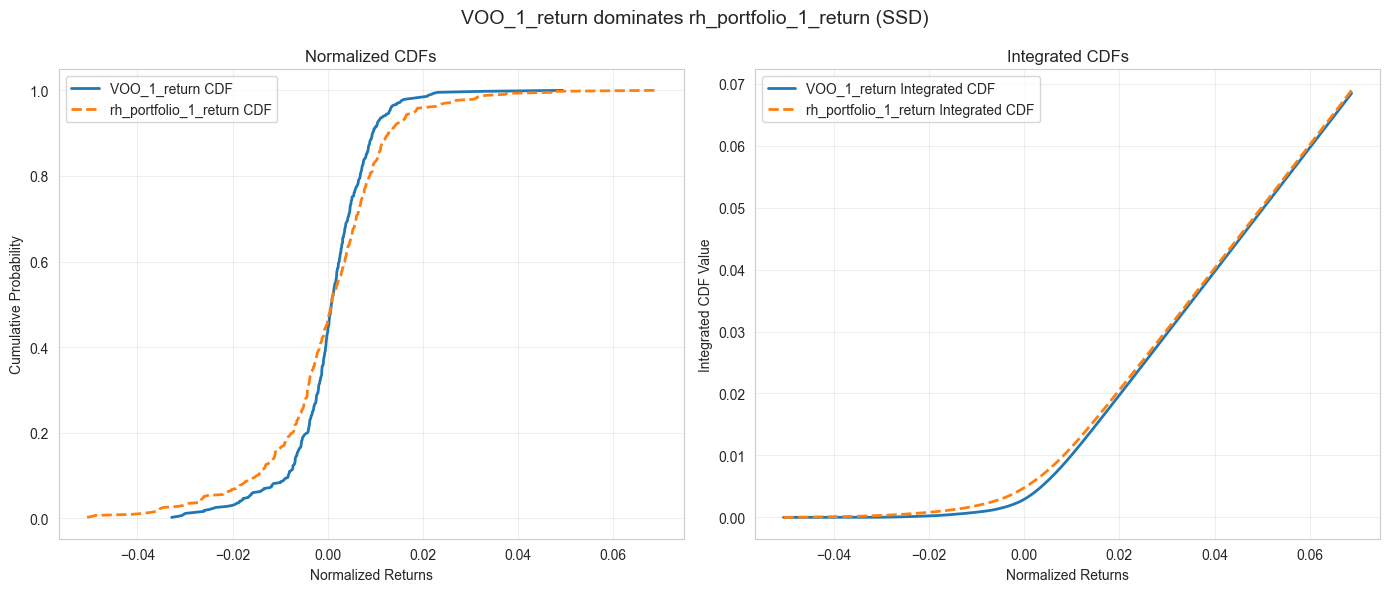

In [ ]:
def test_second_order_stochastic_dominance(df, col_a, col_b):
    """
    Test for second-order stochastic dominance between two return series from a DataFrame.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing the return series
    col_a : str
        Column name for the first return series
    col_b : str
        Column name for the second return series
        
    Returns:
    --------
    tuple:
        - dominance: bool, True if series A dominates series B
        - integrated_cdf_a: numpy.array, integrated CDF values for series A
        - integrated_cdf_b: numpy.array, integrated CDF values for series B
        - x_grid: numpy.array, common x-axis values for the integrated CDFs
        - dominance_confidence: float, percentage of points where the dominance relation holds
    """
    import numpy as np
    
    # Extract and drop NaN values
    returns_a = df[col_a].dropna().values
    returns_b = df[col_b].dropna().values
    
    # Normalize returns (using standardization)
    #returns_a = (returns_a - np.mean(returns_a)) / np.std(returns_a)
    #returns_b = (returns_b - np.mean(returns_b)) / np.std(returns_b)
    
    # Create sorted arrays and CDFs
    x_a = np.sort(returns_a)
    x_b = np.sort(returns_b)
    cdf_a = np.arange(1, len(x_a) + 1) / len(x_a)
    cdf_b = np.arange(1, len(x_b) + 1) / len(x_b)
    
    # Create integrated CDFs (need to use common x-grid)
    x_grid = np.unique(np.concatenate([x_a, x_b]))
    x_grid.sort()  # Ensure the grid is sorted
    
    # Interpolate CDFs onto common grid
    cdf_a_interp = np.interp(x_grid, x_a, cdf_a, left=0)
    cdf_b_interp = np.interp(x_grid, x_b, cdf_b, left=0)
    
    # Calculate integrated CDFs
    dx = np.diff(x_grid, prepend=x_grid[0] - (x_grid[1] - x_grid[0]))
    integrated_cdf_a = np.cumsum(cdf_a_interp * dx)
    integrated_cdf_b = np.cumsum(cdf_b_interp * dx)
    
    # Test for SSD: A dominates B if integrated_cdf_a <= integrated_cdf_b for all points
    dominance_points = integrated_cdf_a <= integrated_cdf_b
    dominance = np.all(dominance_points)
    dominance_confidence = np.mean(dominance_points) * 100
    
    return dominance, integrated_cdf_a, integrated_cdf_b, x_grid, dominance_confidence

def plot_ssd_comparison(df, col_a, col_b, title=None):
    """
    Test for second-order stochastic dominance and visualize the results.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing the return series
    col_a : str
        Column name for the first return series
    col_b : str
        Column name for the second return series
    title : str, optional
        Plot title
        
    Returns:
    --------
    dominance: bool
        True if series A dominates series B
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Run the SSD test
    dominance, int_cdf_a, int_cdf_b, x_grid, confidence = test_second_order_stochastic_dominance(df, col_a, col_b)
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot 1: Original normalized CDFs
    returns_a = df[col_a].dropna().values
    returns_b = df[col_b].dropna().values
    
    #returns_a = (returns_a - np.mean(returns_a)) / np.std(returns_a)
    #returns_b = (returns_b - np.mean(returns_b)) / np.std(returns_b)
    
    x_a = np.sort(returns_a)
    x_b = np.sort(returns_b)
    cdf_a = np.arange(1, len(x_a) + 1) / len(x_a)
    cdf_b = np.arange(1, len(x_b) + 1) / len(x_b)
    
    ax1.plot(x_a, cdf_a, label=f"{col_a} CDF", linewidth=2)
    ax1.plot(x_b, cdf_b, label=f"{col_b} CDF", linewidth=2, linestyle='--')
    ax1.set_title("Normalized CDFs")
    ax1.set_xlabel("Normalized Returns")
    ax1.set_ylabel("Cumulative Probability")
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # Plot 2: Integrated CDFs
    ax2.plot(x_grid, int_cdf_a, label=f"{col_a} Integrated CDF", linewidth=2)
    ax2.plot(x_grid, int_cdf_b, label=f"{col_b} Integrated CDF", linewidth=2, l inestyle='--')
    ax2.set_title("Integrated CDFs")
    ax2.set_xlabel("Normalized Returns")
    ax2.set_ylabel("Integrated CDF Value")
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    # Add dominance message
    if dominance:
        dom_msg = f"{col_a} dominates {col_b} (SSD)"
    else:
        dom_msg = f"{col_a} does not dominate {col_b} (SSD), {confidence:.1f}% of points support dominance"
    
    if title:
        fig.suptitle(f"{title}\n{dom_msg}", fontsize=14)
    else:
        fig.suptitle(dom_msg, fontsize=14)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    
    return dominance


plot_ssd_comparison(ret, "VOO_1_return", "rh_portfolio_1_return")

#### All Possible Windows 

In [ ]:
from src import Analyzer

an = Analyzer(compare_tickers=["VOO", "VT"])

Loading Robinhood data
Loading CRSP data
Merging...


In [21]:
df_merged = an.df_merged


In [40]:
levels_rh = an._build_levels()
levels_rh

,rh_portfolio,mc,VOO,VT
date,,,,
2018-05-02,96.041674,3.254156e+13,241.78000,73.62
2018-05-03,95.826112,3.247897e+13,241.21001,73.59
2018-05-04,97.179437,3.288194e+13,244.41000,74.22
2018-05-07,97.955565,3.301587e+13,245.17000,74.33
2018-05-08,97.534681,3.303305e+13,245.16000,74.34
...,...,...,...,...
2020-08-07,138.001671,4.041761e+13,307.35999,80.69
2020-08-10,138.034713,4.049861e+13,308.34000,80.91
2020-08-11,135.827047,4.018188e+13,305.85001,80.66


In [41]:
all_windows = set()

dates = df_merged["date"].unique()

for date1 in dates:
    for date2 in dates:
        if date2>date1:
            inner_tuple = (date1, date2)
            all_windows.add(inner_tuple)

all_windows = list(all_windows)


In [ ]:
from tqdm import tqdm
import pandas as pd

all_ret = []
for window in tqdm(all_windows):
    beg = window[0]
    end = window[1]
    
    time = end - beg
    days = time.days

    ret = (levels_rh.loc[end]/levels_rh.loc[beg])**(1/days) - 1


    all_ret.append(ret)

# Create DataFrame from the list of Series
all_ret_df = pd.DataFrame(all_ret)

# Assign MultiIndex with start and end dates
all_ret_df.index = pd.MultiIndex.from_tuples(all_windows, names=["start_date", "end_date"])

all_ret_df['date_difference'] = all_ret_df.index.map(lambda x: (x[1] - x[0]).days)



100%|██████████| 158766/158766 [00:31<00:00, 4973.17it/s]


In [25]:
all_ret_df.sort_values("date_difference", ascending=False)

,,rh_portfolio,mc,VOO,VT,date_difference
start_date,end_date,,,,,
2018-05-02,2020-08-13,0.000487,0.000268,0.000296,0.000124,834
2018-05-03,2020-08-13,0.000490,0.000271,0.000299,0.000125,833
2018-05-02,2020-08-12,0.000467,0.000270,0.000299,0.000128,833
2018-05-04,2020-08-13,0.000474,0.000256,0.000284,0.000115,832
2018-05-03,2020-08-12,0.000470,0.000272,0.000302,0.000128,832
...,...,...,...,...,...,...
2019-09-24,2019-09-25,0.014796,0.006075,0.006118,0.002138,1
2018-05-08,2018-05-09,0.011391,0.008334,0.009708,0.006053,1
2018-06-19,2018-06-20,0.008308,0.002677,0.001809,0.003477,1


In [26]:
all_ret_df.describe()

,rh_portfolio,mc,VOO,VT,date_difference
count,158766.000000,158766.000000,158766.000000,158766.000000,158766.000000
mean,-0.000062,0.000137,0.000172,0.000025,280.551478
std,0.002035,0.001441,0.001441,0.001424,197.901511
min,-0.104402,-0.096536,-0.096718,-0.102274,1.000000
25%,-0.000504,-0.000040,0.000002,-0.000160,113.000000
50%,-0.000187,0.000165,0.000198,0.000057,247.000000
75%,0.000219,0.000389,0.000424,0.000291,419.000000
max,0.075570,0.090540,0.095364,0.091410,834.000000


In [48]:
all_ret_df = all_ret_df.drop(columns="date_difference")
# Compute quantiles
lower = all_ret_df.quantile(0.005)
upper = all_ret_df.quantile(0.995)

# Filter out rows where any column is outside the 1st–99th percentile range
all_ret_df_clean = all_ret_df[
    ~((all_ret_df < lower) | (all_ret_df > upper)).any(axis=1)
]


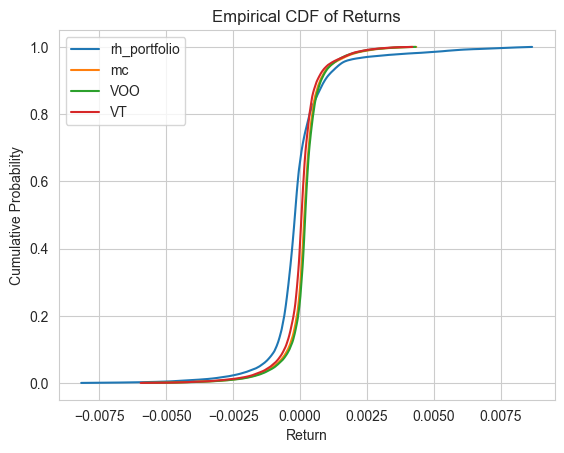

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Plot for each column
for col in all_ret_df_clean.columns:
    data = np.sort(all_ret_df_clean[col])
    cdf = np.arange(1, len(data) + 1) / len(data)
    plt.plot(data, cdf, label=col)

plt.title("Empirical CDF of Returns")
plt.xlabel("Return")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid(True)
plt.show()


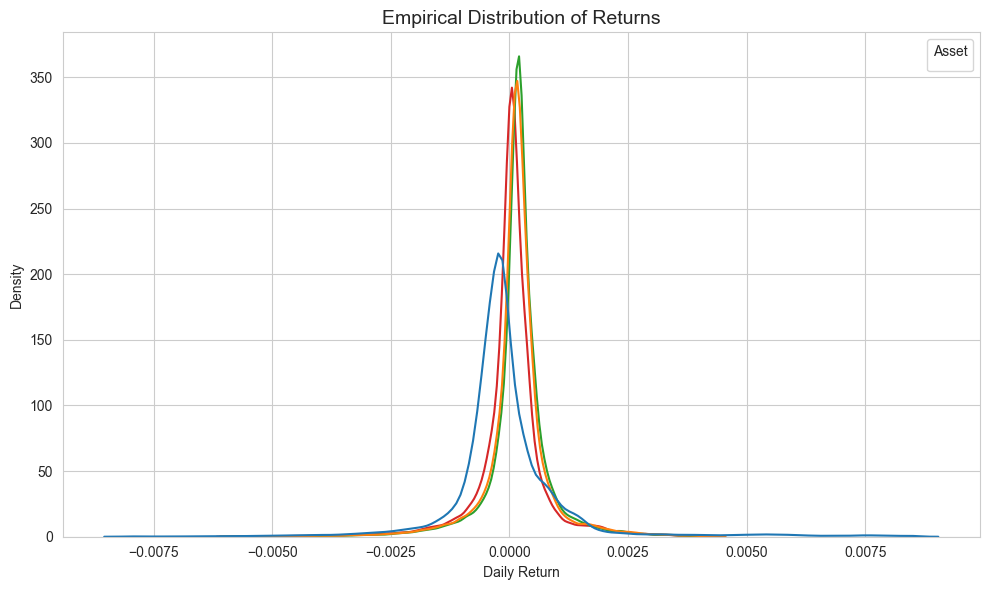

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: reset index in case it's datetime or multiindex
df = all_ret_df_clean.reset_index(drop=True)

# Reshape your DataFrame to long format
df_long = df.melt(var_name='asset', value_name='Return')

# Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_long, x='Return', hue="asset")

# Styling
plt.title("Empirical Distribution of Returns", fontsize=14)
plt.xlabel("Daily Return")
plt.ylabel("Density")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Asset")

plt.show()


In [30]:
test = levels_rh / levels_rh.iloc[0]*100
test 

,rh_portfolio,mc,VOO,VT
date,,,,
2018-05-02,100.000000,100.000000,100.000000,100.000000
2018-05-03,99.775554,99.807671,99.764253,99.959250
2018-05-04,101.184656,101.046006,101.087766,100.814996
2018-05-07,101.992771,101.457563,101.402101,100.964412
2018-05-08,101.554541,101.510360,101.397965,100.977995
...,...,...,...,...
2020-08-07,143.689365,124.203051,127.123827,109.603369
2020-08-10,143.723769,124.451980,127.529159,109.902200
2020-08-11,141.425115,123.478678,126.499301,109.562619


<Axes: ylabel='Density'>

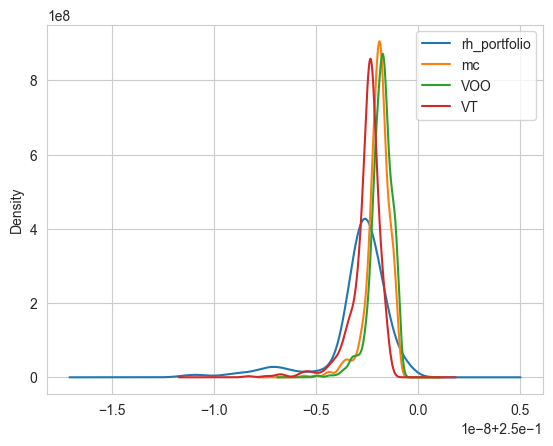

In [31]:
def crra(col, gamma):
    utility = (col**(1-gamma)-1)/(1-gamma)
    return utility

#gamma_value = 2
#levels_rh.apply(lambda x: crra(x, gamma=gamma_value))
utility = crra(test, gamma=5)
utility = utility.replace([np.inf, -np.inf], np.nan)
utility = utility.dropna(axis=0)

utility.plot(kind="kde")


### Trading Frequency

In [32]:
from src.DataLoader import DataLoader
import numpy as np

dl = DataLoader(handle_nans="drop")

df = dl.merge_dfs()

df

Loading Robinhood data
Loading CRSP data
Merging...


,date,ticker,holders,shrcd,vol,prc_adj,shrout_adj,daily_returns,cumulative_returns,mc,mc_retail,holders_change_pct,holders_change_diff,total_holders,popularity,market_weight,retail_weight,total_holders_change_pct,total_holders_change_diff
0,2018-05-02,A,590.000000,11.0,2240482.0,65.91,322477000.0,0.000000,0.000000,2.125446e+10,38886.900000,NaN,NaN,5.199292e+06,0.000113,0.000653,0.000078,NaN,NaN
1,2018-05-03,A,586.473684,11.0,2365851.0,66.34,322477000.0,0.006503,0.006503,2.139312e+10,38906.664211,-0.005977,-3.526316,5.207544e+06,0.000113,0.000659,0.000078,0.001587,8251.771750
2,2018-05-04,A,587.458333,11.0,1331017.0,67.00,322477000.0,0.009900,0.016402,2.160596e+10,39359.708333,0.001679,0.984649,5.204840e+06,0.000113,0.000657,0.000078,-0.000519,-2703.986424
3,2018-05-07,A,585.900000,11.0,1468735.0,67.39,322477000.0,0.005804,0.022206,2.173173e+10,39483.801000,-0.002653,-1.558333,5.194440e+06,0.000113,0.000658,0.000078,-0.001998,-10400.130796
4,2018-05-08,A,577.125000,11.0,1916103.0,67.37,322477000.0,-0.000297,0.021910,2.172528e+10,38880.911250,-0.014977,-8.775000,5.200559e+06,0.000111,0.000658,0.000077,0.001178,6119.008349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2874703,2020-08-07,ZYNE,32151.291667,11.0,542213.0,4.22,29255000.0,-0.018780,-0.897151,1.234561e+08,135678.450833,-0.002449,-78.916667,3.239298e+07,0.000993,0.000003,0.000030,0.001664,53808.041667
2874704,2020-08-10,ZYNE,32060.833333,11.0,584599.0,4.24,29255000.0,0.004728,-0.892423,1.240412e+08,135937.933333,-0.002814,-90.458333,3.245664e+07,0.000988,0.000003,0.000030,0.001965,63660.625000
2874705,2020-08-11,ZYNE,31939.875000,11.0,449620.0,4.07,29255000.0,-0.040920,-0.933344,1.190679e+08,129995.291250,-0.003773,-120.958333,3.249282e+07,0.000983,0.000003,0.000029,0.001115,36178.458333
2874706,2020-08-12,ZYNE,31851.578947,11.0,980844.0,3.96,29255000.0,-0.027399,-0.960742,1.158498e+08,126132.252632,-0.002764,-88.296053,3.247689e+07,0.000981,0.000003,0.000027,-0.000490,-15922.644737


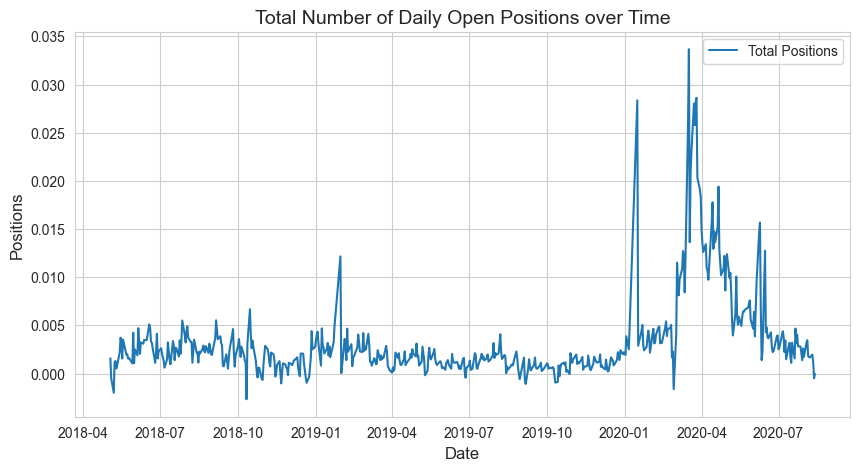

In [33]:
df_plot = df[["date", "total_holders"]].groupby("date").mean().pct_change()
sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))  # Set figure size
sns.lineplot(x=df_plot.index, y=df_plot["total_holders"], label="Total Positions")

# Formatting
plt.xlabel('Date', fontsize=12)
plt.ylabel('Positions', fontsize=12)
plt.title('Total Number of Daily Open Positions over Time', fontsize=14)
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend()

# Show the plot
plt.show()

**Hint:** Only existing investors can sell shares!

<Axes: xlabel='date'>

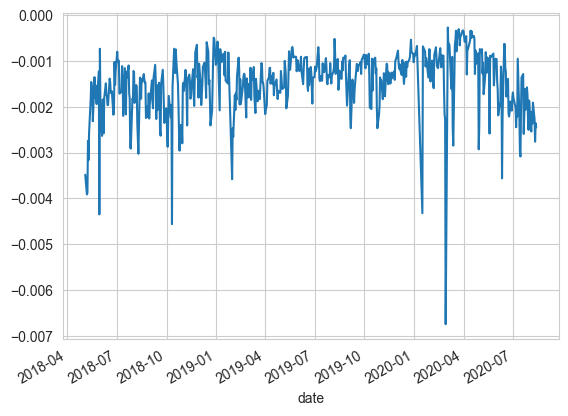

In [34]:
df_sold = df[df["holders_change_pct"]<0]


df_sold = df_sold[["holders_change_diff", "total_holders", "date"]].groupby("date").agg({
    "holders_change_diff":"sum",
    "total_holders":"mean"
})
df_sold["activity"] = df_sold["holders_change_diff"] / df_sold["total_holders"].shift(1)
df_sold.dropna(inplace=True)
df_sold["activity"].plot()

In [35]:
df["retail_activity"] = df["holders_change_diff"].abs() / df["vol"]

df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset="retail_activity")



df["retail_activity"].describe()

count    2.854047e+06
mean     2.664588e-04
std      1.093830e-02
min      0.000000e+00
25%      7.454951e-07
50%      4.582094e-06
75%      1.986528e-05
max      5.814171e+00
Name: retail_activity, dtype: float64

In [36]:
df.sort_values("retail_activity", ascending=False)

,date,ticker,holders,shrcd,vol,prc_adj,shrout_adj,daily_returns,cumulative_returns,mc,mc_retail,holders_change_pct,holders_change_diff,total_holders,popularity,market_weight,retail_weight,total_holders_change_pct,total_holders_change_diff,retail_activity
458386,2020-01-16,CIG,4044.588235,31.0,352.0,4.014863,5.642100e+07,0.082238,0.729692,226522560.0,16238.466031,1.024318,2046.588235,1.088966e+07,0.000371,5.691291e-06,1.512684e-05,0.028363,300347.865419,5.814171
661904,2019-09-04,DISCB,130.208333,11.0,1.0,31.925000,6.512000e+06,-0.029475,-0.033118,207895600.0,4156.901042,-0.027994,-3.750000,9.756450e+06,0.000013,5.880342e-06,4.709323e-06,0.001656,16133.916667,3.750000
661753,2019-01-23,DISCB,51.583333,11.0,1.0,32.375000,7.000000e+06,-0.074384,-0.019121,226625000.0,1670.010417,-0.056402,-3.083333,7.654998e+06,0.000007,7.072446e-06,2.383394e-06,0.004929,37548.250000,3.083333
1866537,2019-05-23,NSYS,128.750000,11.0,1.0,4.145000,2.685000e+06,0.003625,0.232536,11129325.0,533.668750,-0.022770,-3.000000,8.937193e+06,0.000014,3.271169e-07,6.512848e-07,0.001120,10001.020833,3.000000
312224,2019-09-04,BOSS,110.375000,73.0,1.0,19.145800,2.000000e+05,0.009820,0.048466,3829160.0,2113.217675,0.024362,2.625000,9.756450e+06,0.000011,1.083081e-07,2.394049e-06,0.001656,16133.916667,2.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2385481,2019-08-23,SONA,34.000000,11.0,41068.0,14.280000,2.414400e+07,-0.038466,-0.140857,344776320.0,485.520000,0.000000,0.000000,9.690839e+06,0.000004,1.004332e-05,5.672837e-07,0.001317,12742.520833,0.000000
2385482,2019-08-26,SONA,34.000000,11.0,28640.0,14.610000,2.414400e+07,0.022846,-0.118011,352743840.0,496.740000,0.000000,0.000000,9.713055e+06,0.000004,1.017486e-05,5.712347e-07,0.002292,22215.291667,0.000000
2385483,2019-08-27,SONA,34.000000,11.0,65511.0,14.510000,2.414400e+07,-0.006868,-0.124879,350329440.0,493.340000,0.000000,0.000000,9.729024e+06,0.000003,1.014061e-05,5.688122e-07,0.001644,15969.083333,0.000000
2385484,2019-08-28,SONA,34.000000,11.0,37835.0,14.430000,2.414400e+07,-0.005529,-0.130408,348397920.0,490.620000,0.000000,0.000000,9.734842e+06,0.000003,1.002302e-05,5.637453e-07,0.000598,5818.354167,0.000000


In [37]:
# Compute quantiles
lower = df["retail_activity"].quantile(0.005)
upper = df["retail_activity"].quantile(0.995)

# Filter out rows where any column is outside the 1st–99th percentile range
df_clean = df[
    ~((df["retail_activity"] < lower) | (df["retail_activity"] > upper))
]

df_clean.describe()

,date,holders,shrcd,vol,prc_adj,shrout_adj,daily_returns,cumulative_returns,mc,mc_retail,holders_change_pct,holders_change_diff,total_holders,popularity,market_weight,retail_weight,total_holders_change_pct,total_holders_change_diff,retail_activity
count,2839776,2.839776e+06,2.839776e+06,2.839776e+06,2.839214e+06,2.839214e+06,2.839776e+06,2.839776e+06,2.839214e+06,2.839214e+06,2.838239e+06,2.839776e+06,2.839776e+06,2.839776e+06,2.839214e+06,2.839214e+06,2.839776e+06,2.839776e+06,2.839776e+06
mean,2019-06-23 15:20:55.180690688,2.307729e+03,2.975666e+01,1.213016e+06,4.611339e+01,1.222692e+08,-2.618138e-04,-9.553646e-02,6.949674e+09,2.222260e+05,3.061624e-03,9.568509e+00,1.165451e+07,1.981123e-04,1.982674e-04,1.982652e-04,3.270988e-03,4.849524e+04,3.898509e-05
min,2018-05-03 00:00:00,0.000000e+00,1.100000e+01,1.000000e+00,8.750000e-02,2.500000e+04,-2.014903e+00,-5.015219e+00,4.933913e+05,0.000000e+00,-1.000000e+00,-4.684154e+04,5.194440e+06,0.000000e+00,1.360678e-08,0.000000e+00,-2.668335e-03,-1.977479e+04,0.000000e+00
25%,2018-11-23 00:00:00,5.900000e+01,1.100000e+01,3.766400e+04,1.169000e+01,1.215000e+07,-9.730098e-03,-2.019256e-01,1.620897e+08,1.093557e+03,-3.201616e-03,-8.260870e-01,7.140476e+06,6.046472e-06,4.653241e-06,1.150658e-06,1.047523e-03,8.414583e+03,7.348000e-07
50%,2019-06-24 00:00:00,2.130000e+02,1.100000e+01,2.000850e+05,2.546586e+01,3.550800e+07,1.926558e-04,-1.483951e-02,6.742564e+08,4.081255e+03,0.000000e+00,0.000000e+00,9.127982e+06,2.165889e-05,1.930053e-05,4.385810e-06,1.986673e-03,1.613392e+04,4.517613e-06
75%,2020-01-24 00:00:00,8.038883e+02,7.100000e+01,7.980742e+05,5.199000e+01,9.449700e+07,9.839371e-03,9.548861e-02,3.100733e+09,1.918826e+04,5.074450e-03,1.276316e+00,1.108365e+07,7.852648e-05,8.877910e-05,1.996990e-05,3.467617e-03,3.553504e+04,1.935937e-05
max,2020-08-13 00:00:00,9.439573e+05,7.500000e+01,1.003256e+09,4.699000e+03,1.013935e+10,2.277106e+00,3.494768e+00,1.966963e+12,1.352021e+09,2.685833e+01,5.990375e+04,3.249282e+07,3.633906e-02,4.834144e-02,3.040521e-01,3.366375e-02,4.644862e+05,2.529975e-03
std,NaN,1.634189e+04,2.649601e+01,4.836340e+06,1.006762e+02,3.958238e+08,3.510384e-02,4.435457e-01,3.521232e+10,6.106850e+06,4.291371e-02,2.298934e+02,7.395255e+06,1.213005e-03,9.972127e-04,3.901845e-03,4.508054e-03,8.353160e+04,1.474125e-04


<Axes: ylabel='Density'>

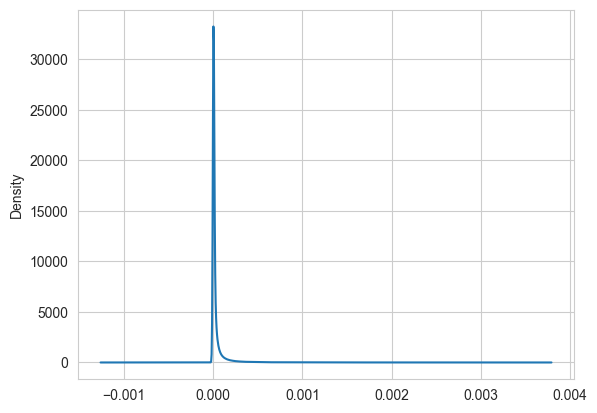

In [38]:

df_clean["retail_activity"].plot(kind="kde")

# Other

In [39]:
import requests

doi = "10.2139/ssrn.4112307"
url = f"https://opencitations.net/index/coci/api/v1/citations/{doi}"
response = requests.get(url)
citations = response.json()
for c in citations:
    print(c['citing'])  # This is the DOI of the citing paper


10.1016/j.finmar.2024.100929
